In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("OnlineRetail.csv", encoding='unicode_escape').dropna().reset_index(drop=True)

In [37]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'diff', 'Amount'],
      dtype='object')

In [45]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()  # sum of the money spend by ID

In [35]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency.head()  # customerID/unique trans

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [34]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['diff'].min().reset_index()
recency['diff'] = recency['diff'].dt.days  
recency.head()  # most recent transaction of each cutomer

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [52]:
## RFM
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4367,18280.0,277,10,180.60
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,756,2094.88


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [66]:
columns = ['Recency', 'Frequency', 'Monetary']
scaled_array = StandardScaler().fit_transform(rfm[columns])
rfm_scaled = pd.DataFrame(scaled_array, columns=columns)  # normalized

In [69]:
kmeans = KMeans(n_clusters=4, max_iter=50).fit(rfm_scaled)
kmeans

c:\Users\daniel.minchev\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [75]:
collect = []
n_clusters = list(range(2,9))
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(rfm_scaled)
    collect.append(kmeans.inertia_)

c:\Users\daniel.minchev\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\daniel.minchev\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\daniel.minchev\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\daniel.minchev\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

Text(0.5, 1.0, 'Elbow plot')

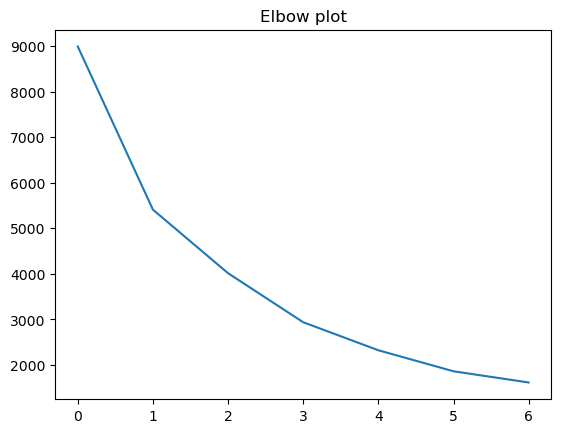

In [78]:
plt.plot(collect)
plt.title('Elbow plot')